#Dataset: [Multi-Class Prediction of Obesity Risk Dataset](https://www.kaggle.com/competitions/playground-series-s4e2)

##Questions to answer:
- (Classification) How important is each variable in predicting an individual’s risk of having cardiovascular disease?
- (Classification) Is there a way to categorise individuals' level of obesity based on information about health and daily habits?

# IMPORTING ESSENTIAL LIBRARIES 

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sb.set()

# INITIAL DATASET

In [2]:
train_path = "data/train.csv"
dataset = pd.read_csv(train_path)
dataset

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### > Create description for features 

In [4]:
data = [
    ["Gender", "Age"],
    ["Height", "Height"],
    ["Weight", "Weight"],
    ["FHWO", "Family history with overweight"],
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables"],
    ["NCP", "Number of main meals"],
    ["CAEC", "Consumption of food between meals"],
    ["SMOKE", "Smoking"],
    ["CH20", "Consumption of water daily"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency"],
    ["TUE", "Time using technology devices"],
    ["CALC", "Consumption of alcohol"],
    ["MTRANS", "Transportation used"],
    ["NObeyesdad", "Body mass index"]
]

# Headers
headers = ["Abbreviation", "Full Form"]

# Create DataFrame
df = pd.DataFrame(data, columns=headers)

# Print DataFrame
df


,Abbreviation,Full Form
0,Gender,Age
1,Height,Height
2,Weight,Weight
3,FHWO,Family history with overweight
4,FAVC,Frequent consumption of high caloric food
5,FCVC,Frequency of consumption of vegetables
6,NCP,Number of main meals
7,CAEC,Consumption of food between meals
8,SMOKE,Smoking
9,CH20,Consumption of water daily


# DATA PREPARATION PART 1 

#### We do some conventional data preparation so that we can visualize the dataset later on. 

## DATA CLEANING 

### > CHECK FOR ANY NULL VALUES

In [5]:
if dataset.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


### > DROP REDUNDANT FEATURES

In [6]:
#drop redundant features
dataset.drop(columns=['id'], axis=1,  inplace=True)

### > SOME EDITS TO FEATURES 

In [7]:
# Classify Group Age 
age = dataset['Age']
def age2group(age):
    if age < 20:
        age = 'Under 20'
    elif age >= 50:
        age = 'Above 50'
    else:
        lowerbound = int(age / 10) * 10
        upperbound = (int(age / 10) + 1) * 10 - 1
        age = str(lowerbound) + '-' + str(upperbound)
    return age
dataset['Age'] = age.apply(age2group)

In [8]:
#Round values of each column to the appropriate decimal places 
dataset['FCVC'] = dataset['FCVC'].round(2)
dataset['NCP'] = dataset['NCP'].round(2)
dataset['FAF'] = dataset['FAF'].round(2)
dataset['Height'] = dataset['Height'].round(2)
dataset['Weight'] = dataset["Weight"].round(2)
dataset['TUE'] = dataset['TUE'].round(2)
dataset['CH2O'] = dataset['CH2O'].round(2)

#Abbreviate features 
dataset.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True) 

#Print dataset 
dataset

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20-29,1.70,81.67,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,Under 20,1.56,57.00,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,Female,Under 20,1.71,50.17,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,Female,20-29,1.71,131.27,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,30-39,1.91,93.80,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20-29,1.77,114.19,yes,yes,2.92,3.00,Sometimes,no,2.15,no,1.33,0.20,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,Under 20,1.71,50.00,no,yes,3.00,4.00,Frequently,no,1.00,no,2.00,1.00,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20-29,1.82,105.58,yes,yes,2.41,3.00,Sometimes,no,2.00,no,1.16,1.20,no,Public_Transportation,Obesity_Type_II
20756,Male,30-39,1.70,83.52,yes,yes,2.67,1.97,Sometimes,no,2.14,no,0.00,0.97,no,Automobile,Overweight_Level_II


## Feature engineering Part 1 

### > CALCULATING AND ADDING BMI

#### Here we add a new feature 'BMI', which is calculated as 'Weight' / ('Height' ^ 2). 

In [9]:
# Calculating Body Mass Index (BMI) + round to 2 decimal numbers 
dataset['BMI'] = (dataset['Weight']/((dataset['Height'])**2)).round(2)

### > REORDERING COLUMNS

In [10]:
dataset.columns[:]

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad', 'BMI'],
      dtype='object')

In [11]:
dataset = dataset[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]

In [12]:
dataset

,Gender,Age,Height,Weight,BMI,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20-29,1.70,81.67,28.26,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,Under 20,1.56,57.00,23.42,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,Female,Under 20,1.71,50.17,17.16,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,Female,20-29,1.71,131.27,44.89,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,30-39,1.91,93.80,25.71,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20-29,1.77,114.19,36.45,yes,yes,2.92,3.00,Sometimes,no,2.15,no,1.33,0.20,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,Under 20,1.71,50.00,17.10,no,yes,3.00,4.00,Frequently,no,1.00,no,2.00,1.00,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20-29,1.82,105.58,31.87,yes,yes,2.41,3.00,Sometimes,no,2.00,no,1.16,1.20,no,Public_Transportation,Obesity_Type_II
20756,Male,30-39,1.70,83.52,28.90,yes,yes,2.67,1.97,Sometimes,no,2.14,no,0.00,0.97,no,Automobile,Overweight_Level_II


## DATA VISUALIZATION 

In [13]:
# Extract only the numeric data variables
dataset_num = dataset.select_dtypes(include='number')

# Summary Statistics for all Variables
dataset_num.describe()

,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,1.700085,87.887761,30.249612,2.445919,2.761317,2.029422,0.981811,0.616697
std,0.087515,26.379438,8.342994,0.533281,0.705399,0.608512,0.838335,0.602135
min,1.450000,39.000000,12.870000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,24.090000,2.000000,3.000000,1.790000,0.010000,0.000000
50%,1.700000,84.060000,29.380000,2.390000,3.000000,2.000000,1.000000,0.570000
75%,1.760000,111.600000,37.080000,3.000000,3.000000,2.550000,1.590000,1.000000
max,1.980000,165.060000,55.150000,3.000000,4.000000,3.000000,3.000000,2.000000


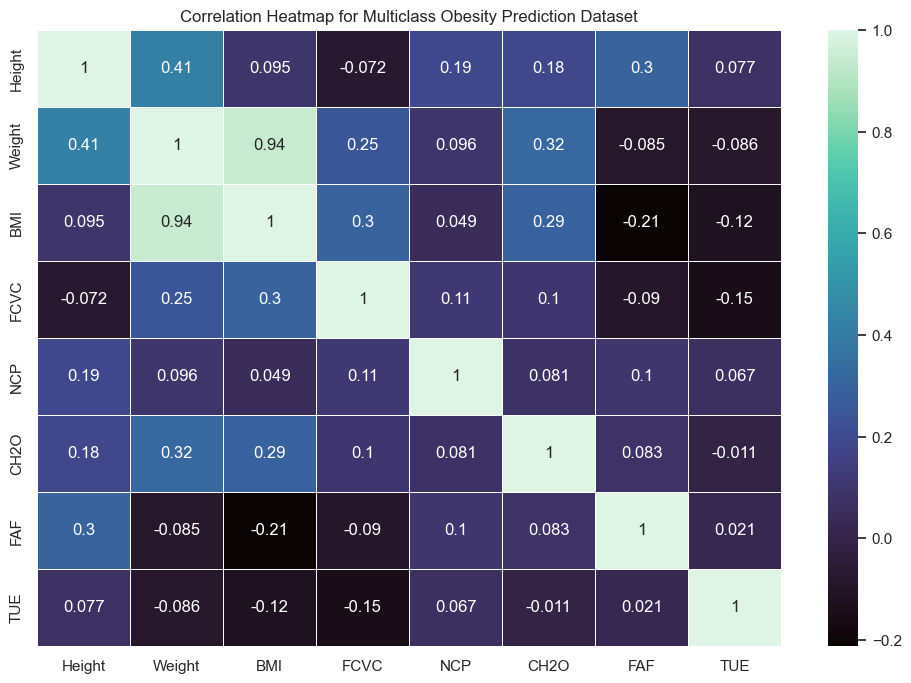

In [14]:
# Create a heatmap to visualize the correlations between numeric data variables
plt.figure(figsize=(12, 8))
sb.heatmap(dataset_num.corr(), annot=True, cmap="mako", linewidths=0.5)
plt.title("Correlation Heatmap for Multiclass Obesity Prediction Dataset")
plt.show()

0 Height
1 Weight


2 BMI
3 FCVC
4 NCP
5 CH2O
6 FAF
7 TUE


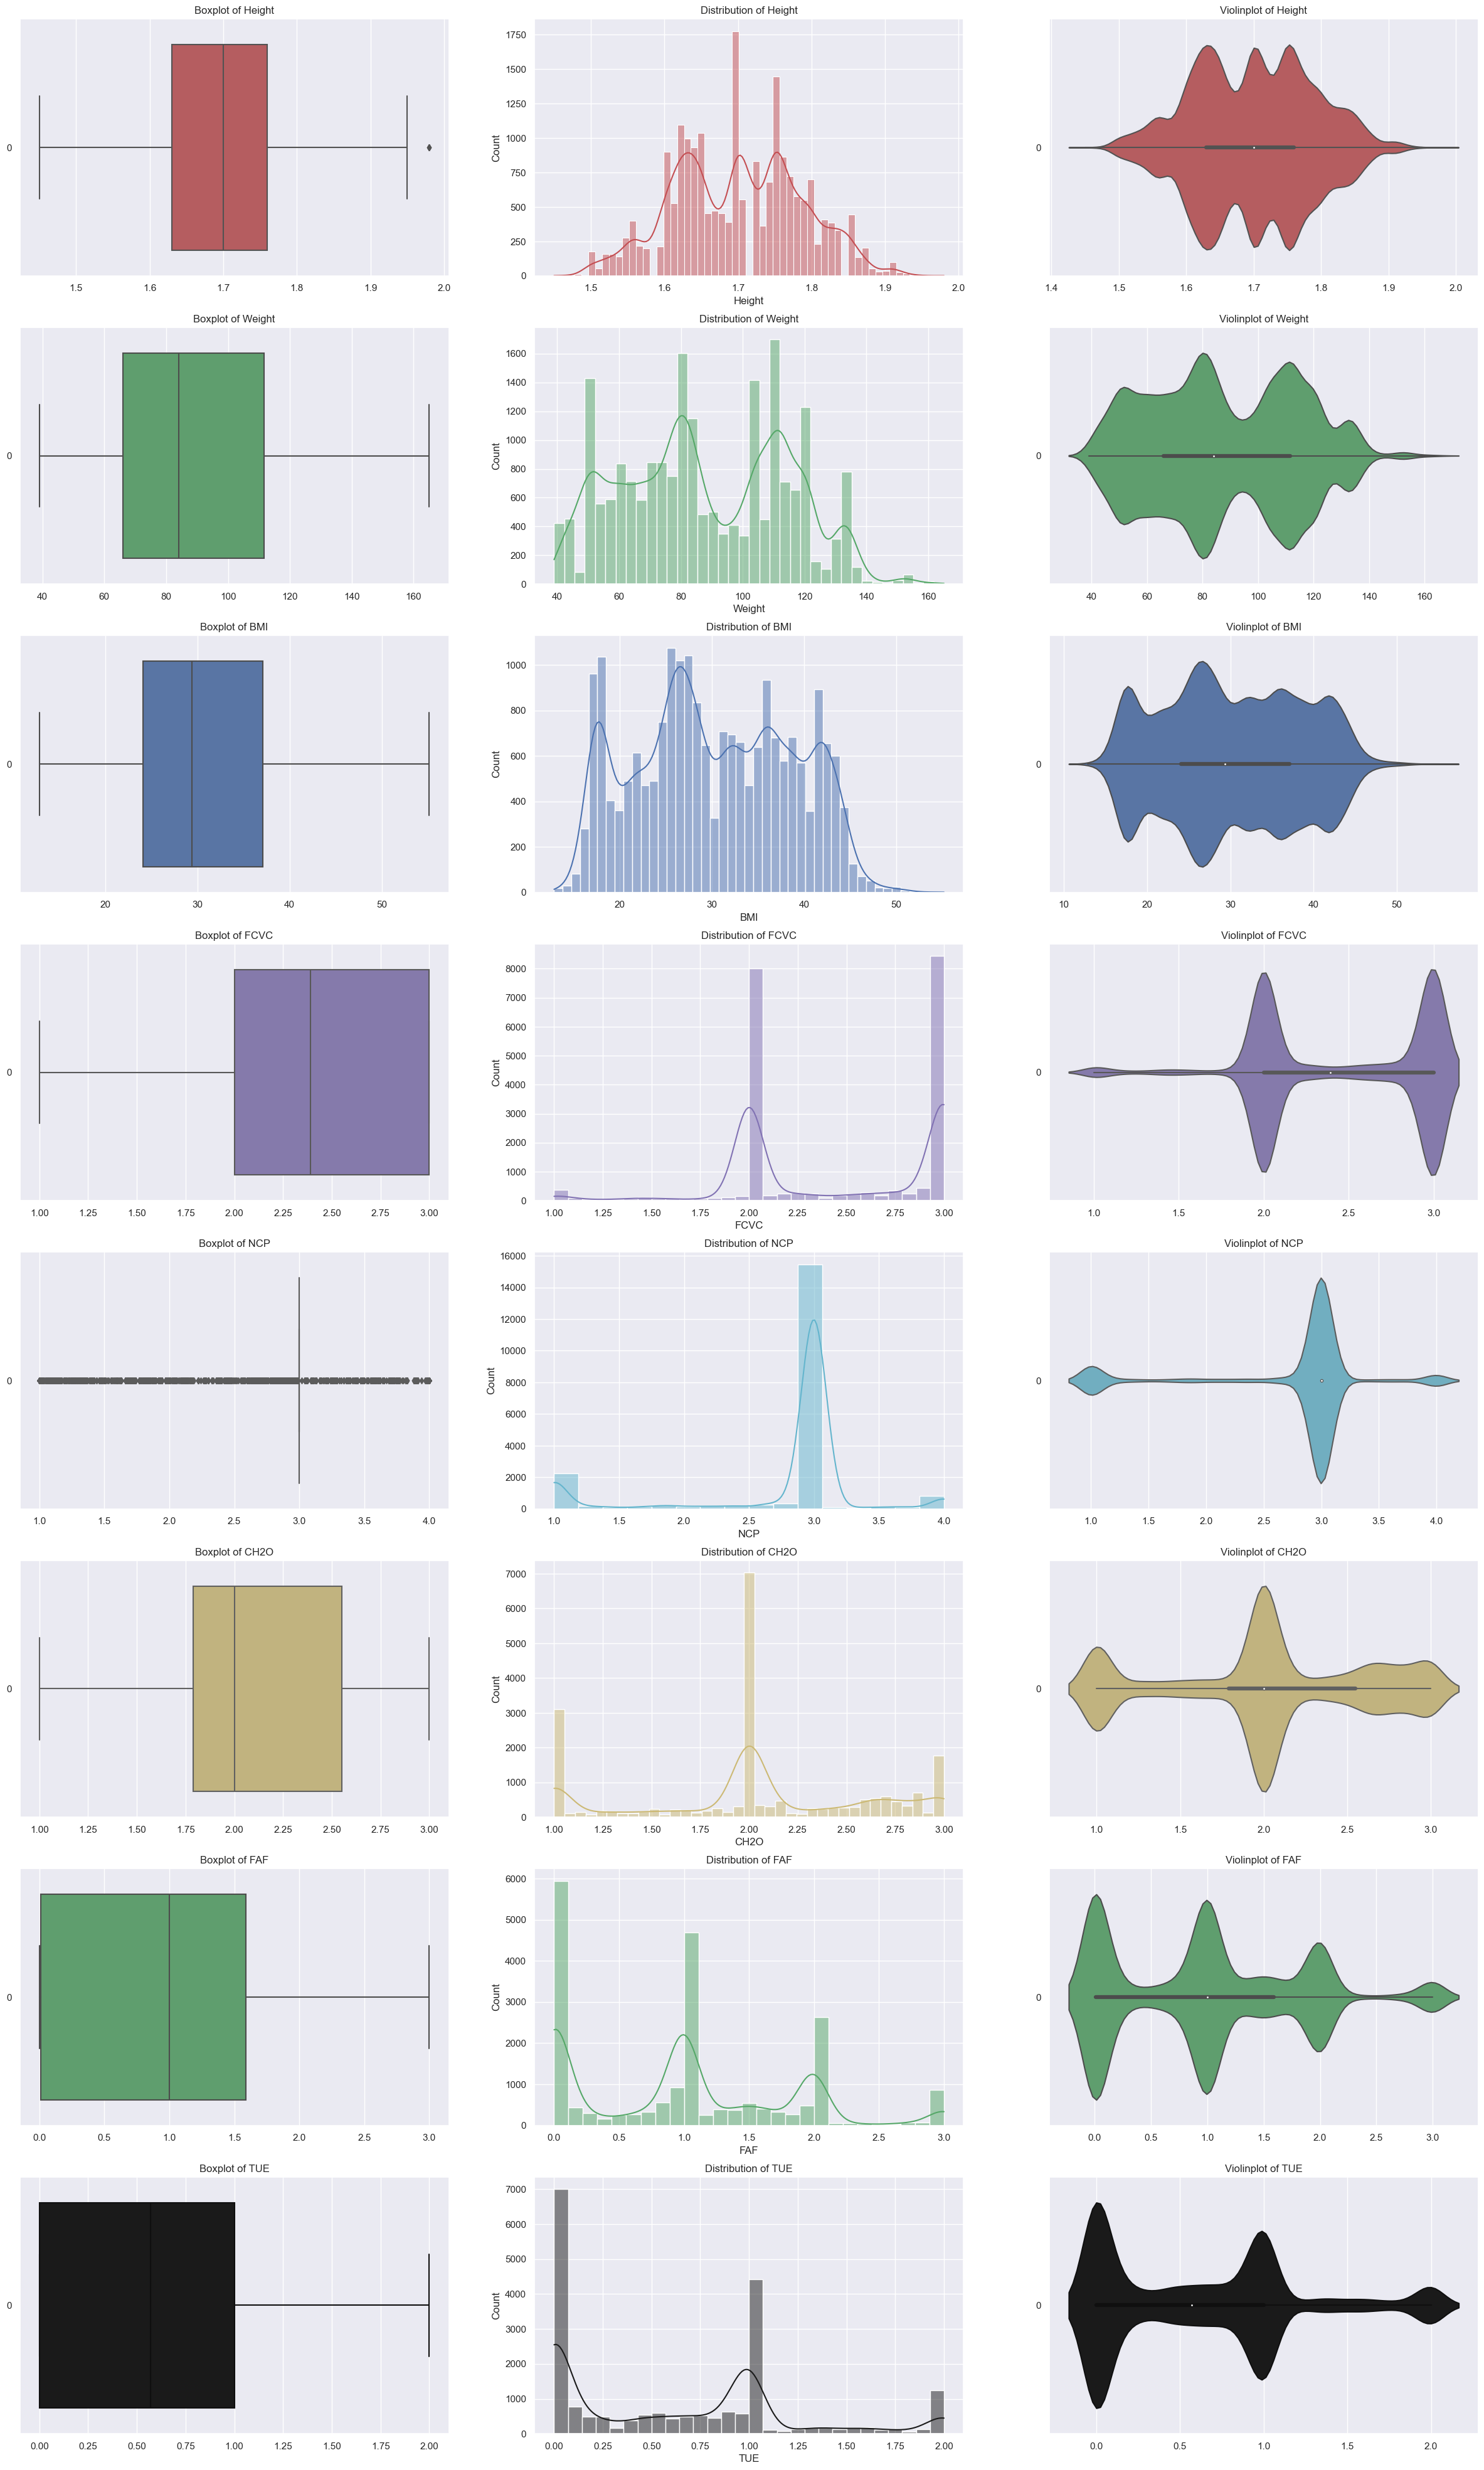

In [15]:
#Create boxplot, kde plot, and violin plot for each numeric features 
f, axes = plt.subplots(len(dataset_num.columns), 3, figsize=(30, 50))
colors = ["r", "g", "b", "m", "c" , "y", "g", "k" ]
for i, var in enumerate(dataset_num.columns):
    sb.boxplot(data = dataset_num[var], orient = "h", color = colors[i], ax = axes[i,0])
    axes[i,0].set_title(f'Boxplot of {var}')
    sb.histplot(data = dataset_num[var], kde = True, color = colors[i], ax = axes[i,1])
    axes[i,1].set_title(f'Distribution of {var}')
    sb.violinplot(data = dataset_num[var], orient = "h", color = colors[i], ax = axes[i,2])
    axes[i,2].set_title(f'Violinplot of {var}')
    print(i, var)

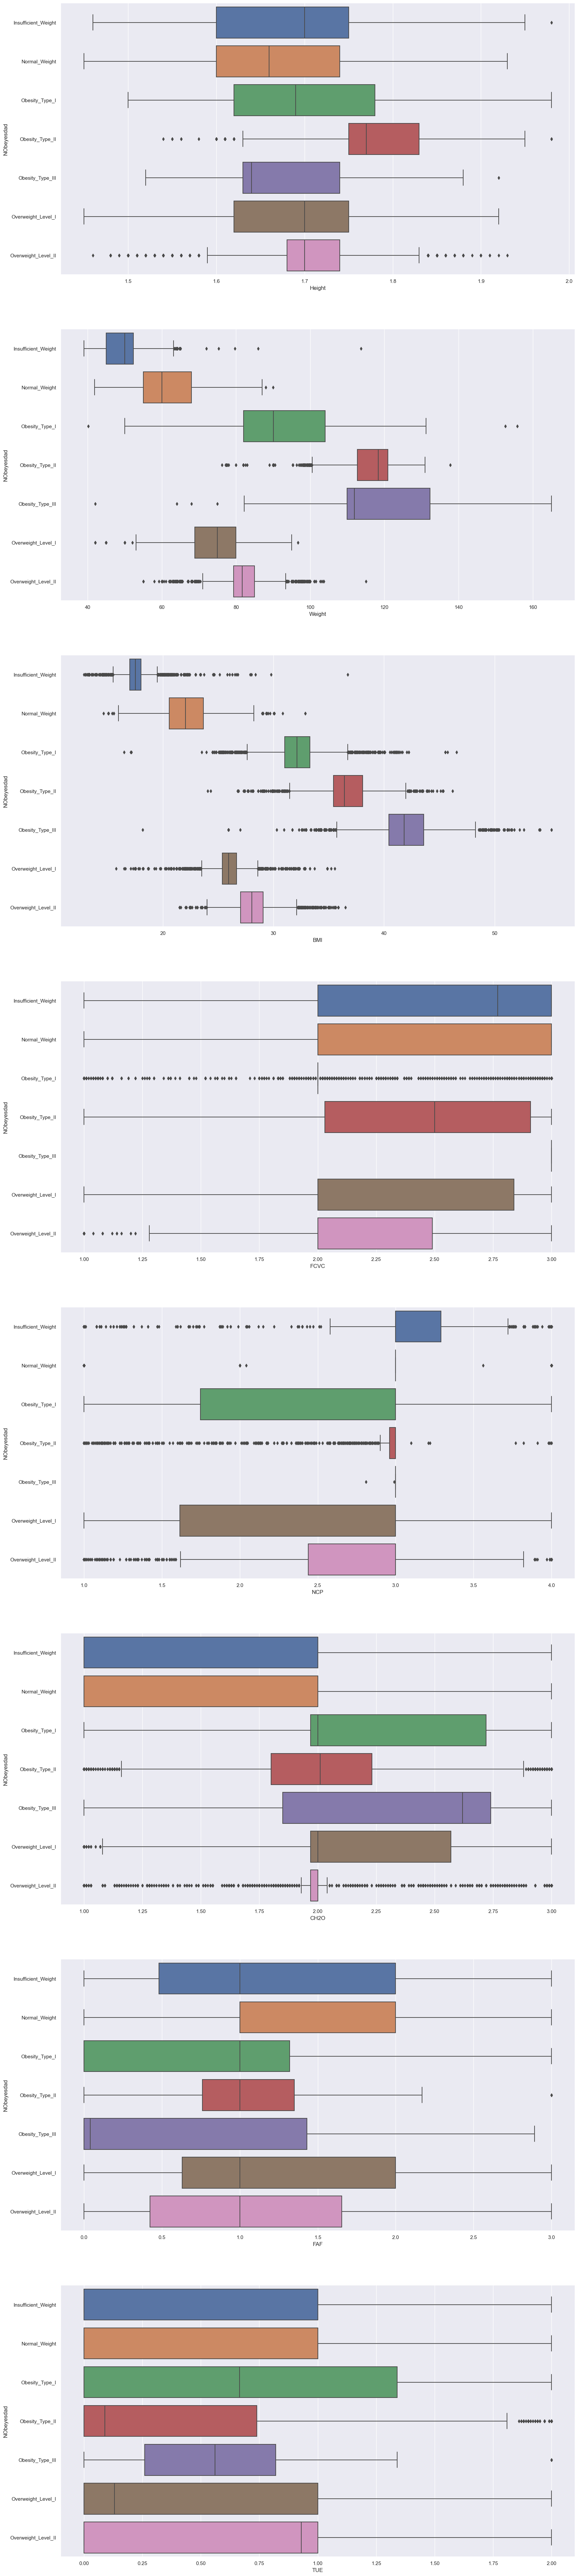

In [16]:
# f, axes = plt.subplots(len(dataset_num.columns), 3, figsize=(30, 50))
# colors = ["r", "g", "b", "m", "c" , "y", "g", "k" ]
# for i, var in enumerate(dataset_num.columns):
#     sb.boxplot(data = dataset_num[var], orient = "h", color = colors[i], ax = axes[i,0])
#     axes[i,0].set_title(f'Boxplot of {var}')
#     sb.histplot(data = dataset_num[var], kde = True, color = colors[i], ax = axes[i,1])
#     axes[i,1].set_title(f'Distribution of {var}')
#     sb.violinplot(data = dataset_num[var], orient = "h", color = colors[i], ax = axes[i,2])
#     axes[i,2].set_title(f'Violinplot of {var}')
#     print(i, var)
dataset_plot = dataset_num.copy()
dataset_plot_df = pd.DataFrame(dataset_plot)
dataset_plot_df['NObeyesdad'] = pd.Categorical(dataset['NObeyesdad'])

# Boxplots for the Features against the Clusters
f, axes = plt.subplots(len(dataset_plot_df.columns) - 1, 1, figsize=(20,100))
colors = ["r", "g", "b", "m", "c" , "y", "g", "k"]                       
for i, var in enumerate(dataset_plot_df.columns[0:-1]):                  
    sb.boxplot(x = var, y = 'NObeyesdad', data = dataset_plot_df, ax = axes[i])
    

Number of Levels of Obesity : 7
NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


c:\Users\GiaBao\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


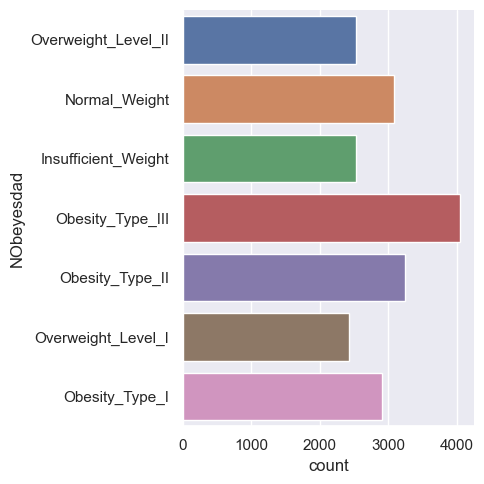

In [17]:
# Levels of Obesity in the Dataset
print("Number of Levels of Obesity :", len(dataset["NObeyesdad"].unique()))

# Pokemons in each Generation
print(dataset["NObeyesdad"].value_counts())
sb.catplot(y = "NObeyesdad", data = dataset, kind = "count")

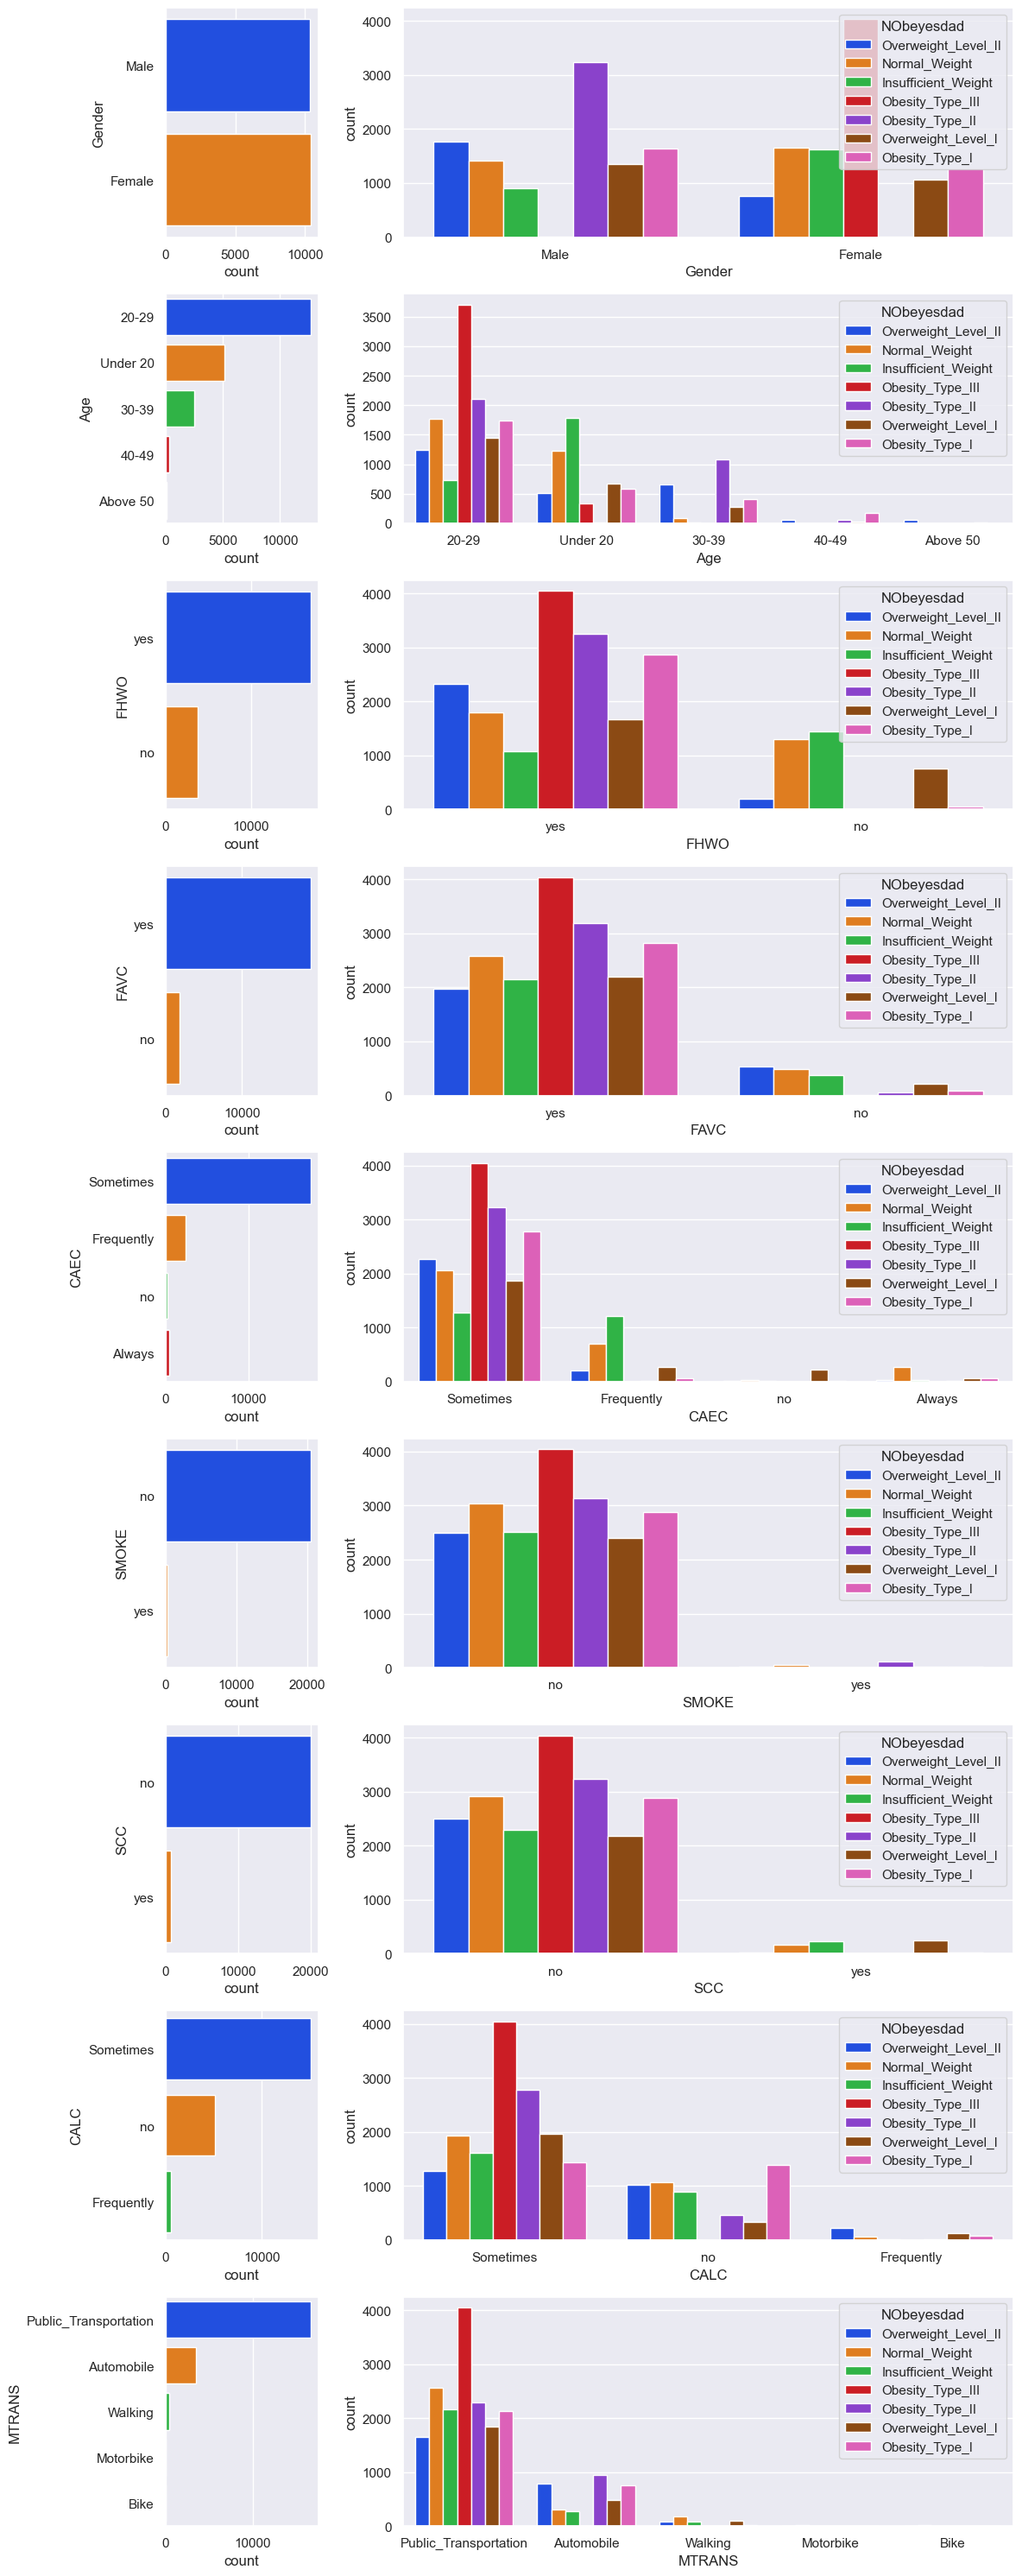

In [18]:
dataset_cat = dataset.select_dtypes(exclude = 'number').columns

_,axs = plt.subplots(int(len(dataset_cat)-1),2,figsize=(12,len(dataset_cat)*3),width_ratios=[1, 4])
for i,col in enumerate(dataset_cat[0:-1]):
    sb.countplot(y=col, data = dataset, palette="bright",ax=axs[i,0])
    sb.countplot(x=col, data = dataset, hue = dataset['NObeyesdad'], palette="bright",ax=axs[i,1])


plt.tight_layout()
plt.show()

# DATA PREPARATION PART 2 

## Feature engineering Part 2 

### > Remove Outliers of some Features 

In [19]:
#Create bounds for the features to remove outliers 
quartile = dataset[["Height", "Weight", "BMI"]].quantile([0.25,0.75])
iqr = quartile.iloc[1] - quartile.iloc[0]
upper = quartile.iloc[1] + 1.5*iqr
lower = quartile.iloc[0] - 1.5*iqr

#Remove outliers from the dataset 
dataset.drop(dataset[(dataset["Height"] < lower["Height"]) | (dataset["Height"] > upper["Height"])].index, inplace=True)
dataset.drop(dataset[(dataset["Weight"] < lower["Weight"]) | (dataset["Weight"] > upper["Weight"])].index, inplace=True)
dataset.drop(dataset[(dataset["BMI"] < lower["BMI"]) | (dataset["BMI"] > upper["BMI"])].index, inplace=True)


dataset

C:\Users\GiaBao\AppData\Local\Temp\ipykernel_17900\3749882151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset[(dataset["Height"] < lower["Height"]) | (dataset["Height"] > upper["Height"])].index, inplace=True)
C:\Users\GiaBao\AppData\Local\Temp\ipykernel_17900\3749882151.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset[(dataset["Weight"] < lower["Weight"]) | (dataset["Weight"] > upper["Weight"])].index, inplace=True)
C:\Users\GiaBao\AppData\Local\Temp\ipykernel_17900\3749882151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Gender,Age,Height,Weight,BMI,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20-29,1.70,81.67,28.26,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,Under 20,1.56,57.00,23.42,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,Female,Under 20,1.71,50.17,17.16,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,Female,20-29,1.71,131.27,44.89,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,30-39,1.91,93.80,25.71,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,20-29,1.77,114.19,36.45,yes,yes,2.92,3.00,Sometimes,no,2.15,no,1.33,0.20,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,Under 20,1.71,50.00,17.10,no,yes,3.00,4.00,Frequently,no,1.00,no,2.00,1.00,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20-29,1.82,105.58,31.87,yes,yes,2.41,3.00,Sometimes,no,2.00,no,1.16,1.20,no,Public_Transportation,Obesity_Type_II
20756,Male,30-39,1.70,83.52,28.90,yes,yes,2.67,1.97,Sometimes,no,2.14,no,0.00,0.97,no,Automobile,Overweight_Level_II


### > Drop some redundant features

#### After visualizing, we figure out some categorical features are biased and do not contribute to the prediction of levels of obesity. |

In [20]:
dataset.drop(columns=['SMOKE'], axis=1,  inplace=True)
dataset.drop(columns=['SCC'], axis=1, inplace=True)

C:\Users\GiaBao\AppData\Local\Temp\ipykernel_17900\1057152094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['SMOKE'], axis=1,  inplace=True)
C:\Users\GiaBao\AppData\Local\Temp\ipykernel_17900\1057152094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['SCC'], axis=1, inplace=True)


### > Splitting features and target

In [21]:
target = 'NObeyesdad'
features = dataset.columns.drop(target)

#Features
X = dataset[features]

#Target
y = dataset[target]


### > Splitting train set and test set  

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Using for validation of neural network model
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)  
 
print(f'Shape of X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'Shape of X_test is {X_test.shape} and y_test is {y_test.shape}')

Shape of X_train is (14527, 15) and y_train is (14527,)
Shape of X_test is (6227, 15) and y_test is (6227,)


### > Adding K-Means feature 

#### We add K-Means feature to help group the datapoints to specific clusters; hence, the model could be trained and predict better. 

c:\Users\GiaBao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GiaBao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GiaBao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\GiaBao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

Text(0, 0.5, 'WCSS')

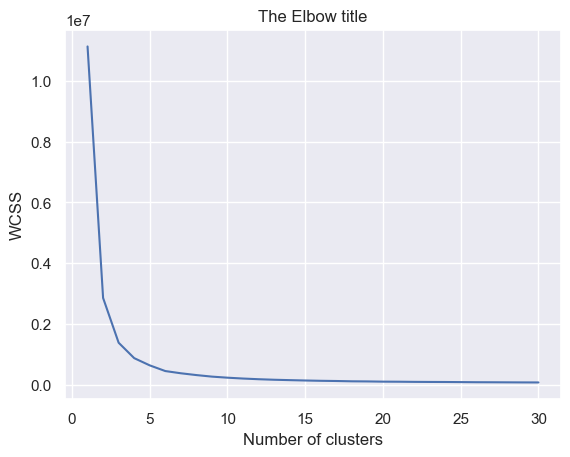

In [23]:
#Import K-Means 
from sklearn.cluster import KMeans

#Create numeric columns and categorical columns 
raw_num_cols = list(X.select_dtypes('number').columns)
raw_cat_cols = list(X.select_dtypes(exclude = 'number').columns)

# Figure out which number of clusters is best
n = 30
wcss = [] # Within-cluster Sum of Squares
for i in range(1, n + 1):
    kmeans = KMeans(i)
    kmeans.fit(X_train[raw_num_cols])
    wcss.append(kmeans.inertia_)

num_clusters = range(1, n + 1)
plt.plot(num_clusters, wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [24]:
#Generating K-means 
n_ = 4
kmeans = KMeans(n_)
kmeans.fit(X_train[raw_num_cols])
training_kmeans = kmeans.predict(X_train[raw_num_cols])
testing_kmeans = kmeans.predict(X_test[raw_num_cols])

#Adding k-means to train and test sets 
X_train = pd.concat([X_train, pd.DataFrame(training_kmeans.astype(str), columns=['kmeans'], index=X_train.index)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(testing_kmeans.astype(str), columns=['kmeans'], index=X_test.index)], axis=1)

#Adding K-means to categorical columns 
raw_cat_cols.append('kmeans')

print(f'Shape of X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'Shape of X_test is {X_test.shape} and y_test is {y_test.shape}')

c:\Users\GiaBao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Shape of X_train is (14527, 16) and y_train is (14527,)
Shape of X_test is (6227, 16) and y_test is (6227,)


### > Feature Scaling and Encoding 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def processingData(X, isTest=False):
    #Numeric Data
    X_numeric = X.select_dtypes(include='number')
    numeric = X_numeric.columns
    
    #Categorical Data
    X_categorical = X.select_dtypes(exclude='number')
    categorical = X_categorical.columns

    # Process Numeric Data
    if not isTest:
        X_numeric = pd.DataFrame(scaler.fit_transform(X_numeric))
    else:
        X_numeric = pd.DataFrame(scaler.transform(X_numeric))
    
    X_numeric = X_numeric.set_axis(numeric, axis=1)

    # Process Categorical Data
    X_categorical = pd.get_dummies(X_categorical, drop_first = True)
    X_scaled = pd.concat([X_numeric, X_categorical.set_axis(X_numeric.index)], axis=1)
    X_scaled.reset_index(drop=True, inplace=True)
    return X_scaled

X_train = processingData(X_train)
X_test = processingData(X_test, True)
print(f'Shape of X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'Shape of X_test is {X_test.shape} and y_test is {y_test.shape}')

Shape of X_train is (14527, 27) and y_train is (14527,)
Shape of X_test is (6227, 27) and y_test is (6227,)


In [26]:
pd.DataFrame(X_train)

,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,Age_30-39,...,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,kmeans_1,kmeans_2,kmeans_3
0,0.794084,-1.251494,-1.524580,-0.829432,1.735870,0.709461,1.216463,2.079948,True,False,...,False,False,True,False,False,True,False,False,True,False
1,-0.695719,0.894350,1.346331,1.042128,0.334762,0.973013,-1.172857,-0.425131,False,False,...,False,True,False,False,False,True,False,False,False,True
2,0.794084,-0.302086,-0.565609,-0.829432,-1.505077,-0.147081,0.021803,1.366581,True,False,...,False,True,False,False,False,True,False,False,False,False
3,-0.008118,0.595336,0.674211,-0.099524,0.320610,-1.695445,-0.479954,0.354595,True,True,...,False,True,False,False,False,True,False,False,False,True
4,-0.008118,-0.224297,-0.223549,0.873688,-0.146426,-0.048249,0.021803,-1.022369,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14522,-0.924920,0.840466,1.405141,1.042128,0.334762,0.610629,-1.160911,0.553675,False,False,...,False,True,False,False,False,True,False,False,False,True
14523,-0.695719,0.882207,1.331928,1.042128,0.334762,1.088316,-1.172857,-0.790110,False,False,...,False,True,False,False,False,True,False,False,False,True
14524,-0.581119,0.909908,1.304323,1.042128,0.334762,-1.580142,-1.172857,-0.873060,False,False,...,False,True,False,False,False,True,False,False,False,True
14525,-0.581119,0.909908,1.304323,1.042128,0.334762,1.220092,-1.172857,-0.624211,False,False,...,False,True,False,False,False,True,False,False,False,True


In [27]:
pd.DataFrame(X_test)

,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,Age_30-39,...,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,kmeans_1,kmeans_2,kmeans_3
0,-0.581119,-0.302086,-0.104727,-0.829432,-2.085334,-0.048249,-0.623314,0.636624,True,False,...,False,True,False,False,False,True,False,False,False,False
1,-0.695719,0.006035,0.300945,0.780110,-2.495759,-1.283646,-1.101178,1.432941,False,False,...,False,True,False,False,False,True,False,False,False,False
2,0.679484,-0.377978,-0.608817,1.042128,0.334762,-0.048249,-0.229076,0.055977,False,False,...,False,True,False,False,False,True,False,False,False,False
3,1.367086,0.189314,-0.263156,0.349651,0.334762,-0.427104,-0.109610,-0.242642,True,True,...,False,True,False,False,False,True,False,False,False,False
4,-0.237318,-1.474237,-1.542583,-0.904295,1.353750,-0.097665,1.216463,0.636624,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6222,1.023285,0.783168,0.436569,-0.829432,-2.325928,0.973013,0.021803,1.200682,True,False,...,False,False,True,False,False,True,False,False,False,True
6223,0.564884,-1.448054,-1.679408,0.836257,0.334762,1.220092,-0.085717,-0.192872,False,False,...,False,False,True,False,False,True,False,False,True,False
6224,0.908685,0.067887,-0.230750,-0.829432,-1.406009,-1.448366,-0.145450,-1.022369,True,False,...,False,True,False,False,False,False,False,False,False,False
6225,0.221083,-0.226194,-0.303963,-2.700993,0.334762,-0.048249,0.021803,0.636624,False,False,...,False,False,True,False,False,True,False,False,False,False


# TRAINING MODELS

In [28]:
def plt_confusion_matrix(cm, normalize=False, labels=None, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print()
    if labels is not None:
        d = {index: label for index, label in enumerate(labels)}
        print('Index and Its Corresponding Label:')
        print(d)
        print()
    if ax is None:
        ax = plt.gca()
    sb.heatmap(cm, cmap=cmap, annot=True, fmt='d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predict')
    ax.set_ylabel('Actual')
    plt.tight_layout()

## Random Forest

Random Forest is an advanced usage of Decision Tree.

#### Recall about Decision Tree

Decision Tree is a method of classification which makes use of a tree with each node describing a condition about some features. When it is trained, all of the samples are passed in and the classification is decided based on gini score. When a sample is passed in for testing, it is compared with each node until it reaches a leaf, from which the classification is decided.

#### How does Random Forest work?

Random Forest makes use of multiple Decision Trees. First of all, the algorithm bootstraps a number of samples and features for each tree. In other words, it selects some samples and features RANDOMLY for training each tree. When a sample is used for testing, it is classified independently by every single tree. Then the classification is aggregated by voting for the majority result. This method of bootstrapping and aggregating is called BAGGING. 

#### How to evaluate its accuracy?

Typically, there are a number of samples that is not included in the bootstrapping. They are called Out-of-Bag dataset. The accuracy of a Random Forest model is measured by the proportion of Out-of-Bag samples that were correctly classified by the model.

#### How to optimize its accuracy?

We can try to increase the accuracy score by tuning the hyperparameters. For example, we can decide on the number of trees so that the algorithm can create for training.

Reference: 

https://www.youtube.com/watch?si=tCa5kLpL8RsDoH8C&v=v6VJ2RO66Ag&feature=youtu.be

https://www.youtube.com/watch?si=57QwNp3Z-iouAkbh&v=_QuGM_FW9eo&feature=youtu.be

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=198, random_state=42)
rf.fit(X_train, y_train)
labels_rf = rf.classes_

print('--------------TRAIN DATASET--------------')

print("ACCURACY:", rf.score(X_train, y_train))
y_train_pred = rf.predict(X_train)
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

--------------TRAIN DATASET--------------
ACCURACY: 0.9988297652646796
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00      1768
      Normal_Weight       1.00      1.00      1.00      2169
     Obesity_Type_I       1.00      1.00      1.00      2023
    Obesity_Type_II       1.00      1.00      1.00      2279
   Obesity_Type_III       1.00      1.00      1.00      2832
 Overweight_Level_I       1.00      1.00      1.00      1667
Overweight_Level_II       1.00      1.00      1.00      1789

           accuracy                           1.00     14527
          macro avg       1.00      1.00      1.00     14527
       weighted avg       1.00      1.00      1.00     14527



--------------TEST DATASET---------------
ACCURACY: 0.8956158663883089
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93       754
      Normal_Weight       0.85      0.90      0.88       913
     Obesity_Type_I       0.89      0.86      0.88       886
    Obesity_Type_II       0.97      0.97      0.97       967
   Obesity_Type_III       1.00      1.00      1.00      1214
 Overweight_Level_I       0.79      0.73      0.76       760
Overweight_Level_II       0.76      0.78      0.77       733

           accuracy                           0.90      6227
          macro avg       0.88      0.88      0.88      6227
       weighted avg       0.90      0.90      0.90      6227

Confusion matrix, without normalization

Index and Its Corresponding Label:
{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Lev

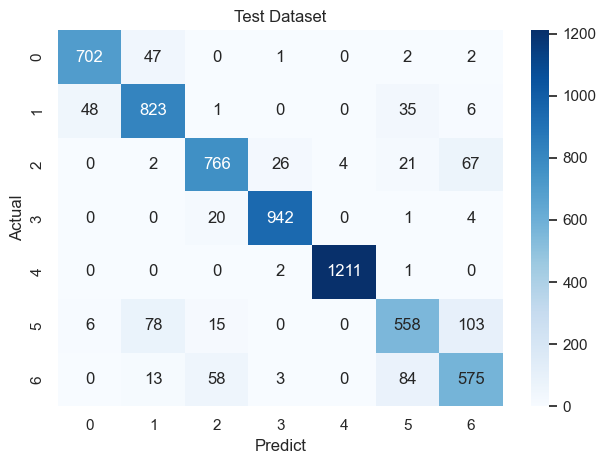

In [49]:
print('--------------TEST DATASET---------------')

print("ACCURACY:", rf.score(X_test, y_test))
y_test_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

cm_rf_test = confusion_matrix(y_test, y_test_pred)
plt_confusion_matrix(cm_rf_test, title='Test Dataset', labels=labels_rf)

## Neural Network

In [51]:
!pip install tensorflow -q

#### What is Neural Network

Neural network model consists of a set of algorithms that mimic the work of the human brain. A “neuron” in a neural network is a mathematical function which, in general, process information by responding to external inputs and passing their output to the next layer of neurons. The network learns to perform tasks by adjusting the connections (or weights) between these neurons, typically through a process known as Backpropagation. As long as we choose a good architecture, neural network performs very well in complex non-linear tasks.

#### How to improve model

Tuning hyperparameters is the first approach to improve model. Some hyperparameters we can consider are the number of layers, and the number of neurons in each layer. Choosing appropriate loss function and optimizer also plays a vital role. Particularly, we use loss function 'sparse_categorical_crossentropy' as the target y is in the format of integers, and optimizer Adam. We can add some special layers in Hidden Layers to improve the process. In this project, we utilize BatchNormalization and Dropout layers after each Dense layers. 

Reference: https://training.atmosera.com/building-neural-networks-with-keras-and-tensorflow/

As its configuration, it requires the input must be in tensors. Tensors are simply mathematical objects that can be used to describe physical properties, just like scalars (0-rank tensor) and vectors (1-rank tensor). 

In [32]:
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)

label_encoder = LabelEncoder()

# Fit the encoder and transform the labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) 

In [44]:
model_nn = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train_tf.shape[1], )),
    Dropout(0.05),
    BatchNormalization(),
    Dense(units=256, activation='relu'),
    Dropout(0.1),
    BatchNormalization(),
    Dense(units=160, activation='relu'),
    Dropout(0.05),
    BatchNormalization(),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

optimizer = tf.keras.optimizers.Adam()
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               7168      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [45]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             patience=5,
                                             restore_best_weights=True)

# checkpoint_path = r"C:\Users\GiaBao\OneDrive - Nanyang Technological University\Documents_Onedrive\NTU\Main Semester\Sem 2 Year 1\IE0005\Project\best_model_weights.h5"
# checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                 monitor='val_loss',
#                                                 mode='min',
#                                                 save_best_only=True)
optimizer.learning_rate.assign(0.0001)
history = model_nn.fit(X_train_tf, y_train_encoded,
                    validation_data=(X_test_tf, y_test_encoded),
                    epochs=100,
                    callbacks=[earlystop,
                            #    checkpoint
                               ]
)

Epoch 1/100
454/454 [==============================] - 3s 3ms/step - loss: 0.6061 - accuracy: 0.7675 - val_loss: 0.4179 - val_accuracy: 0.8457
Epoch 2/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4827 - accuracy: 0.8188 - val_loss: 0.4143 - val_accuracy: 0.8508
Epoch 3/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4397 - accuracy: 0.8379 - val_loss: 0.4199 - val_accuracy: 0.8518
Epoch 4/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.8431 - val_loss: 0.3865 - val_accuracy: 0.8640
Epoch 5/100
454/454 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8543 - val_loss: 0.3855 - val_accuracy: 0.8600
Epoch 6/100
454/454 [==============================] - 1s 3ms/step - loss: 0.3774 - accuracy: 0.8613 - val_loss: 0.3792 - val_accuracy: 0.8702
Epoch 7/100
454/454 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8688 - val_loss: 0.3743 - val_accuracy: 0.8686

195/195 [==============================] - 0s 1ms/step
--------------TRAIN DATASET--------------
ACCURACY: 0.9072761065601983
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.93      1768
      Normal_Weight       0.87      0.88      0.88      2169
     Obesity_Type_I       0.91      0.86      0.89      2023
    Obesity_Type_II       0.95      0.98      0.97      2279
   Obesity_Type_III       1.00      1.00      1.00      2832
 Overweight_Level_I       0.80      0.80      0.80      1667
Overweight_Level_II       0.82      0.84      0.83      1789

           accuracy                           0.91     14527
          macro avg       0.90      0.90      0.90     14527
       weighted avg       0.91      0.91      0.91     14527



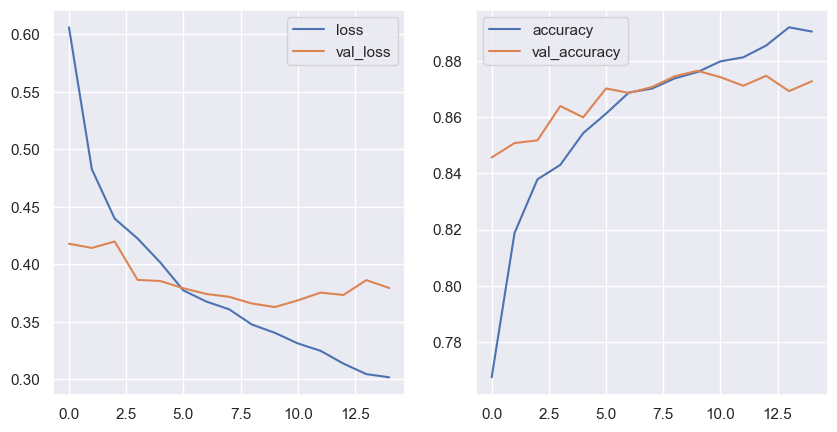

In [46]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()

train_pred_nn = model_nn.predict(X_train_tf)
train_pred_index_nn= np.argmax(train_pred_nn, axis=1)
train_pred_label_nn = label_encoder.inverse_transform(train_pred_index_nn)

test_pred_nn = model_nn.predict(X_test_tf)
test_pred_index_nn = np.argmax(test_pred_nn, axis=1)
test_pred_label_nn = label_encoder.inverse_transform(test_pred_index_nn)

print('--------------TRAIN DATASET--------------')
print("ACCURACY:", accuracy_score(y_train_encoded, train_pred_index_nn))
print("Classification Report:")
print(classification_report(y_train, train_pred_label_nn))

--------------TEST DATASET---------------
ACCURACY: 0.8765055403886302
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.90      0.91       754
      Normal_Weight       0.82      0.88      0.85       913
     Obesity_Type_I       0.89      0.83      0.86       886
    Obesity_Type_II       0.95      0.98      0.96       967
   Obesity_Type_III       1.00      1.00      1.00      1214
 Overweight_Level_I       0.74      0.72      0.73       760
Overweight_Level_II       0.73      0.74      0.73       733

           accuracy                           0.88      6227
          macro avg       0.86      0.86      0.86      6227
       weighted avg       0.88      0.88      0.88      6227

Confusion matrix, without normalization



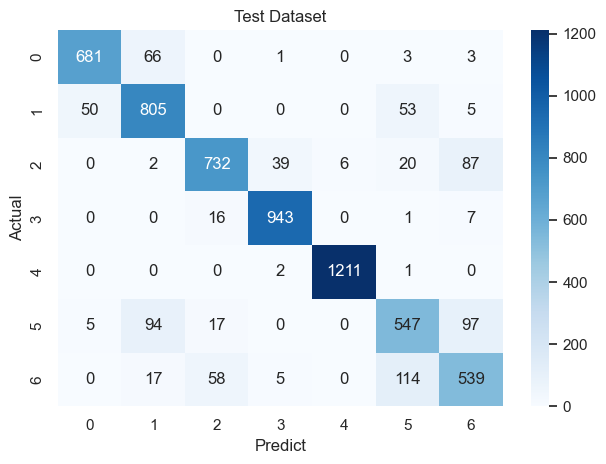

In [47]:
print('--------------TEST DATASET---------------')
print("ACCURACY:", accuracy_score(y_test_encoded, test_pred_index_nn))
print("Classification Report:")
print(classification_report(y_test, test_pred_label_nn))
cm_nn_test = confusion_matrix(y_test, test_pred_label_nn)
plt_confusion_matrix(cm_nn_test, title='Test Dataset')

## XGBoost

In [50]:
#Install xgboost 
!pip install xgboost -q

#### What is XGBoost

XGBoost is a machine learning algorithm known for its speed and performance in handling structured data.It works by building an ensemble of weak decision trees sequentially, where each subsequent tree corrects the errors of the previous ones. This iterative process allows XGBoost to continuously improve its predictive accuracy. XGBoost is particularly effective for classification problems due to its ability to handle complex relationships in the data, handle missing values, and prevent overfitting.

#### How to optimize its accuracy?

We can try to increase the accuracy score by tuning the hyperparameters.

In [38]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder =  LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train_encoded)


print('--------------TRAIN DATASET--------------')

train_pred_index_xg = xgb.predict(X_train)
print("ACCURACY:", accuracy_score(y_train_encoded, train_pred_index_xg))
train_pred_label_xg = label_encoder.inverse_transform(train_pred_index_xg)
print("Classification Report:")
print(classification_report(y_train, train_pred_label_xg))

c:\Users\GiaBao\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


--------------TRAIN DATASET--------------
ACCURACY: 0.9987609279273078
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00      1768
      Normal_Weight       1.00      1.00      1.00      2169
     Obesity_Type_I       1.00      1.00      1.00      2023
    Obesity_Type_II       1.00      1.00      1.00      2279
   Obesity_Type_III       1.00      1.00      1.00      2832
 Overweight_Level_I       0.99      1.00      1.00      1667
Overweight_Level_II       1.00      1.00      1.00      1789

           accuracy                           1.00     14527
          macro avg       1.00      1.00      1.00     14527
       weighted avg       1.00      1.00      1.00     14527



--------------TEST DATASET---------------
ACCURACY: 0.8946523205395857
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.92      0.93       754
      Normal_Weight       0.85      0.90      0.88       913
     Obesity_Type_I       0.88      0.87      0.87       886
    Obesity_Type_II       0.96      0.97      0.97       967
   Obesity_Type_III       1.00      1.00      1.00      1214
 Overweight_Level_I       0.80      0.73      0.76       760
Overweight_Level_II       0.77      0.79      0.78       733

           accuracy                           0.89      6227
          macro avg       0.88      0.88      0.88      6227
       weighted avg       0.89      0.89      0.89      6227

Confusion matrix, without normalization



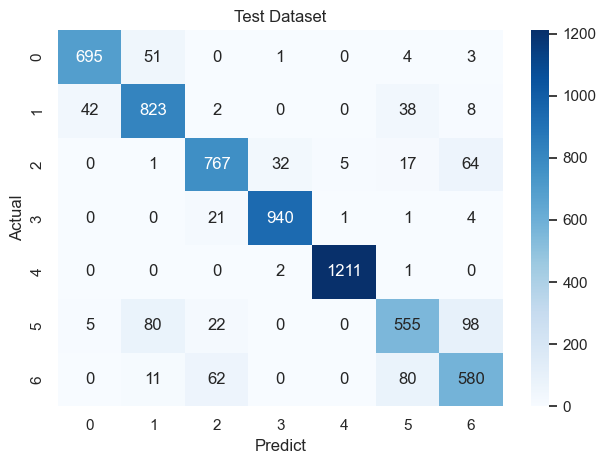

In [39]:
print('--------------TEST DATASET---------------')

test_pred_index_xg = xgb.predict(X_test)
test_pred_label_xg = label_encoder.inverse_transform(test_pred_index_xg)
print("ACCURACY:", accuracy_score(y_test_encoded, test_pred_index_xg))
print("Classification Report:")
print(classification_report(y_test, test_pred_label_xg))

cm_xg_test = confusion_matrix(y_test, test_pred_label_xg)
plt_confusion_matrix(cm_xg_test, title='Test Dataset')